<a href="https://colab.research.google.com/github/asifmanowar9/ML-Project/blob/main/Fake_Note_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)



TensorFlow version: 2.19.0


In [4]:
import os

input_dir = "/content/drive/MyDrive/dataset"
output_dir = "/content/drive/MyDrive/augmented_dataset"

os.makedirs(output_dir, exist_ok=True)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [6]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.05,
    fill_mode='nearest'
)


In [7]:
target_images = 1000

for note in os.listdir(input_dir):
    note_path = os.path.join(input_dir, note)
    save_path = os.path.join(output_dir, note)
    os.makedirs(save_path, exist_ok=True)

    count = 0

    for img_name in os.listdir(note_path):
        img_path = os.path.join(note_path, img_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for _ in datagen.flow(
            x,
            batch_size=1,
            save_to_dir=save_path,
            save_prefix=note,
            save_format='jpg'
        ):
            count += 1
            if count >= target_images:
                break

        if count >= target_images:
            break

    print(f"{note} : {count} images generated")


2 Taka : 1000 images generated
20 Taka : 1000 images generated
10 Taka : 1000 images generated
5 Taka : 1000 images generated


In [8]:
for note in os.listdir(output_dir):
    print(note, "=>", len(os.listdir(os.path.join(output_dir, note))))


2 Taka => 950
20 Taka => 954
10 Taka => 956
5 Taka => 961


In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import random

target_images = 1000

for note in os.listdir(input_dir):
    note_path = os.path.join(input_dir, note)
    save_path = os.path.join(output_dir, note)
    os.makedirs(save_path, exist_ok=True)

    while len(os.listdir(save_path)) < target_images:
        img_name = random.choice(os.listdir(note_path))
        img_path = os.path.join(note_path, img_name)

        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        iterator = datagen.flow(
            x,
            batch_size=1,
            save_to_dir=save_path,
            save_prefix=note,
            save_format='jpg'
        )

        next(iterator)   # ← correct way

    print(f"{note} => DONE ({len(os.listdir(save_path))} images)")


2 Taka => DONE (1000 images)
20 Taka => DONE (1000 images)
10 Taka => DONE (1000 images)
5 Taka => DONE (1000 images)


In [12]:
for note in os.listdir(output_dir):
    print(note, "=>", len(os.listdir(os.path.join(output_dir, note))))


2 Taka => 1000
20 Taka => 1000
10 Taka => 1000
5 Taka => 1000


Text(0.5, 1.0, '10 Taka')

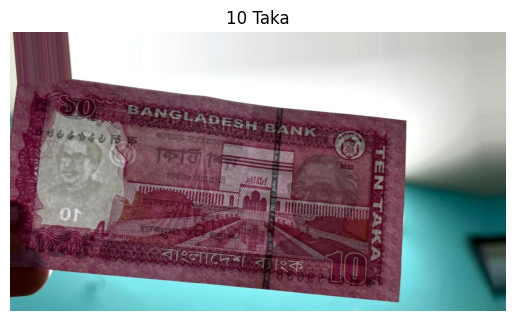

In [13]:
import matplotlib.pyplot as plt
import random

note = random.choice(os.listdir(output_dir))
img_name = random.choice(os.listdir(os.path.join(output_dir, note)))

img = load_img(os.path.join(output_dir, note, img_name))
plt.imshow(img)
plt.axis('off')
plt.title(note)
